## Import modules

In [33]:
%reload_ext autoreload
%autoreload 2
from nbs_uncertainty.core.loadfile import load_file
from nbs_uncertainty.processors.rasterProcessor import RasterProcessor
from nbs_uncertainty.readers.bathymetryDataset import RasterDataset
from nbs_uncertainty.utils import utils


## Load Bathymetry Dataset

In [2]:
# define bathymetry filename and load
filename = "../data/raster/BlueTopo.tiff"
bathy_data = load_file(filename)
bathy_data

Warning 1: BlueTopo.tiff: This file used to have optimizations in its layout, but those have been, at least partly, invalidated by later changes


RasterDataset(data=BathymetryDataset(data=RasterDataset([[-43.517, -42.848, -42.954, ..., -90.035, -90.044,
                -90.057],
               [-41.423, -40.985, -42.603, ..., -90.041, -90.044,
                -90.052],
               [-40.001, -39.78 , -40.276, ..., -90.024, -90.035,
                -90.047],
               ...,
               [-58.567, -58.605, -58.676, ..., -99.965, -99.969,
                -99.973],
               [-58.617, -58.69 , -58.731, ..., -99.973, -99.99 ,
                -99.99 ],
               [-58.66 , -58.732, -58.817, ..., -99.971, -99.977,
                -99.984]], shape=(2035, 1493), dtype=float32), 
filename='BlueTopo.tiff', 
filetype='raster, 
metadata='{'ndv_value': 1000000.0, 'resolution': 4.0, 'full_path': '../data/raster/BlueTopo.tiff'}'), 
shape: (2035, 1493),
filename='BlueTopo.tiff', 
full path: ../data/raster/BlueTopo.tiff,
resolution: 4.0,
ndv_value: 1000000.0,
filetype='raster, 
metadata='{'ndv_value': 1000000.0, 'resolution': 4.0

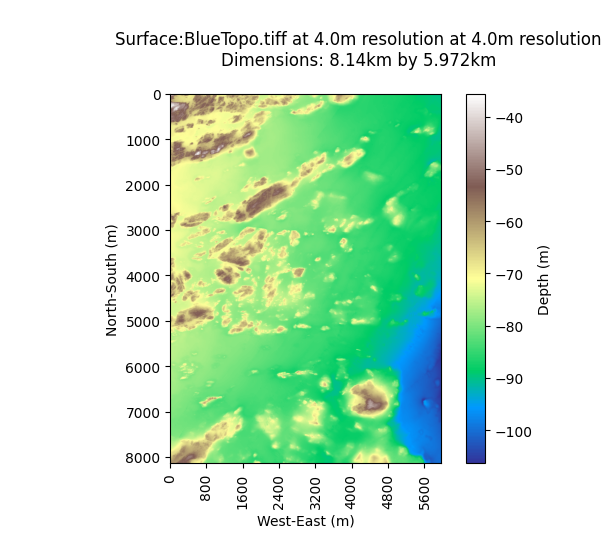

In [3]:
# Optionally, plot the loaded raster bathymetry file
bathy_data.show_depth()

## Define Subsampling Parameters

Subsample full coverage dataset (geoTiffs) into simulated surveys

In [4]:
# define processing parameters
linespacing = 256
max_multiple = 1
current_multiple = 1
processor = RasterProcessor(linespacing_meters=linespacing,
                            max_multiple=max_multiple,
                            multiple=current_multiple)

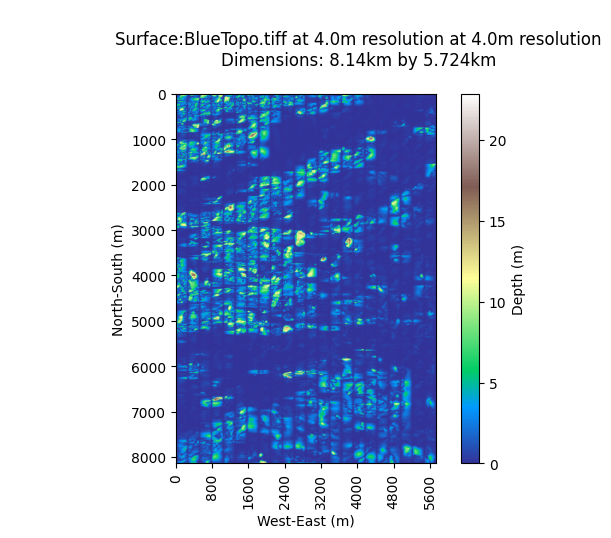

In [5]:
residual = processor.compute_residual_surface(bathy_data)
residual.show_depth()

In [26]:
uncertainty_amp_v1 = processor.estimate_surface(method='amp_v1', bathy_data=bathy_data)
uncertainty_psd_v1 = processor.estimate_surface(method='psd_v1', bathy_data=bathy_data)
uncertainty_amp_elias = processor.estimate_surface(method='amp_v2', bathy_data=bathy_data)
uncertainty_psd_n = processor.estimate_surface(method='psd_n', bathy_data=bathy_data)
uncertainty_psd_lf = processor.estimate_surface(method='psd_lf', bathy_data=bathy_data)
uncertainty_psd_df = processor.estimate_surface(method='psd_df', bathy_data=bathy_data)
uncertainty_spectrum_elias = processor.estimate_surface(method='spectrum', bathy_data=bathy_data)
uncertainty_spatial_std = processor.estimate_surface(method='spatial_std', bathy_data=bathy_data)
uncertainty_spatial_diff = processor.estimate_surface(method='spatial_diff', bathy_data=bathy_data)
uncertainty_spatial_gaussian = processor.estimate_surface(method='spatial_gaussian', bathy_data=bathy_data)


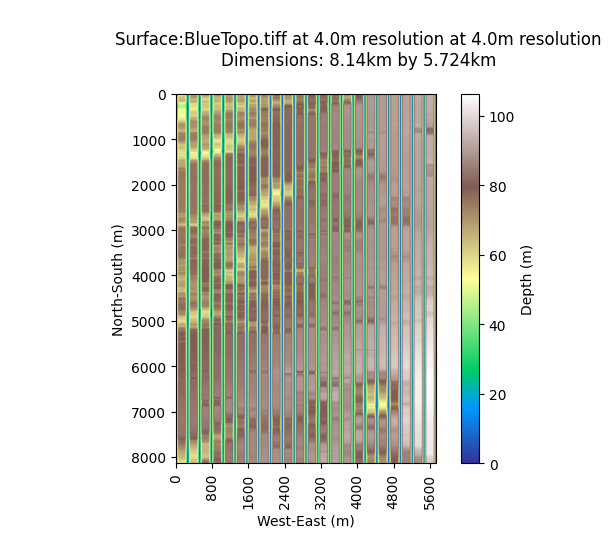

In [27]:
uncertainty_amp_v1.show_depth()

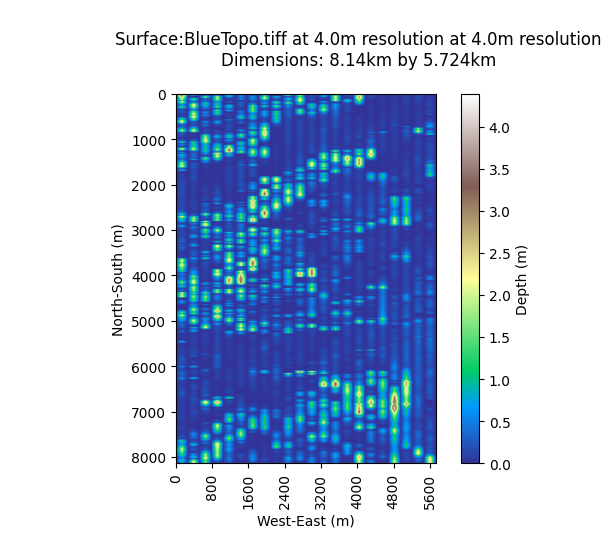

In [28]:
spatial_std_env1 = uncertainty_spatial_std['std_envelope1']
spatial_std_env1.show_depth()



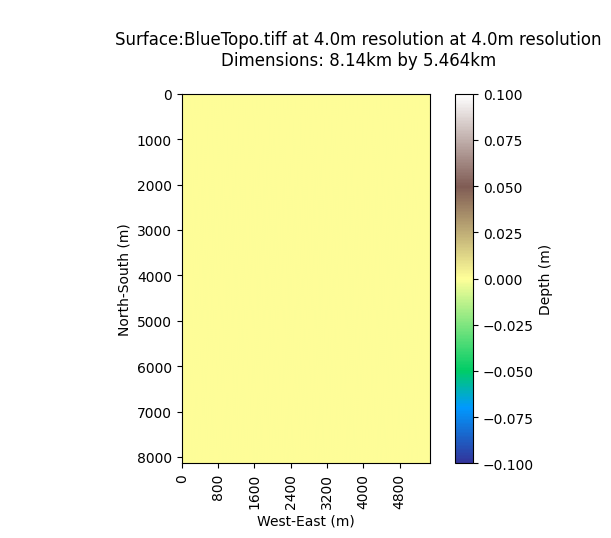

In [17]:
uncertainty_amp_v1.show_depth()

In [30]:

residual_data = residual
uncertainties_dict = {
    "Amplitude": uncertainty_amp_v1,
    "PSD(F)": uncertainty_psd_v1,
    "Amplitude (Elias)": uncertainty_amp_elias,
    "ASD": uncertainty_amp_elias,
    "PSD(n)": uncertainty_psd_n,
    "PSD(lf)": uncertainty_psd_lf,
    "PSD(df)": uncertainty_psd_df,
    "Spatial Max Diff": uncertainty_spatial_diff['difference_max'],
    "Spatial Diff Envelope1": uncertainty_spatial_diff['difference_envelope1'],
    "Spatial Gaussian 95%": uncertainty_spatial_gaussian['gaussian_p95'],
    "Spatial Gaussian 99%": uncertainty_spatial_gaussian['gaussian_p99'],
    "Spatial Gaussian Mean": uncertainty_spatial_gaussian['gaussian_mean'],
    }



(array([   0,    0,    0, ..., 2034, 2034, 2034], shape=(2865139,)), array([   1,    2,    3, ..., 1427, 1428, 1429], shape=(2865139,)))
(array([   0,    0,    0, ..., 2034, 2034, 2034], shape=(2865139,)), array([   1,    2,    3, ..., 1427, 1428, 1429], shape=(2865139,)))
(array([   0,    0,    0, ..., 2034, 2034, 2034], shape=(2865139,)), array([   1,    2,    3, ..., 1427, 1428, 1429], shape=(2865139,)))
(array([   0,    0,    0, ..., 2034, 2034, 2034], shape=(2865139,)), array([   1,    2,    3, ..., 1427, 1428, 1429], shape=(2865139,)))
(array([   0,    0,    0, ..., 2034, 2034, 2034], shape=(2865139,)), array([   1,    2,    3, ..., 1427, 1428, 1429], shape=(2865139,)))
(array([   0,    0,    0, ..., 2034, 2034, 2034], shape=(2865139,)), array([   1,    2,    3, ..., 1427, 1428, 1429], shape=(2865139,)))
(array([   0,    0,    0, ..., 2034, 2034, 2034], shape=(2865139,)), array([   1,    2,    3, ..., 1427, 1428, 1429], shape=(2865139,)))
(array([   0,    0,    0, ..., 2034, 2034

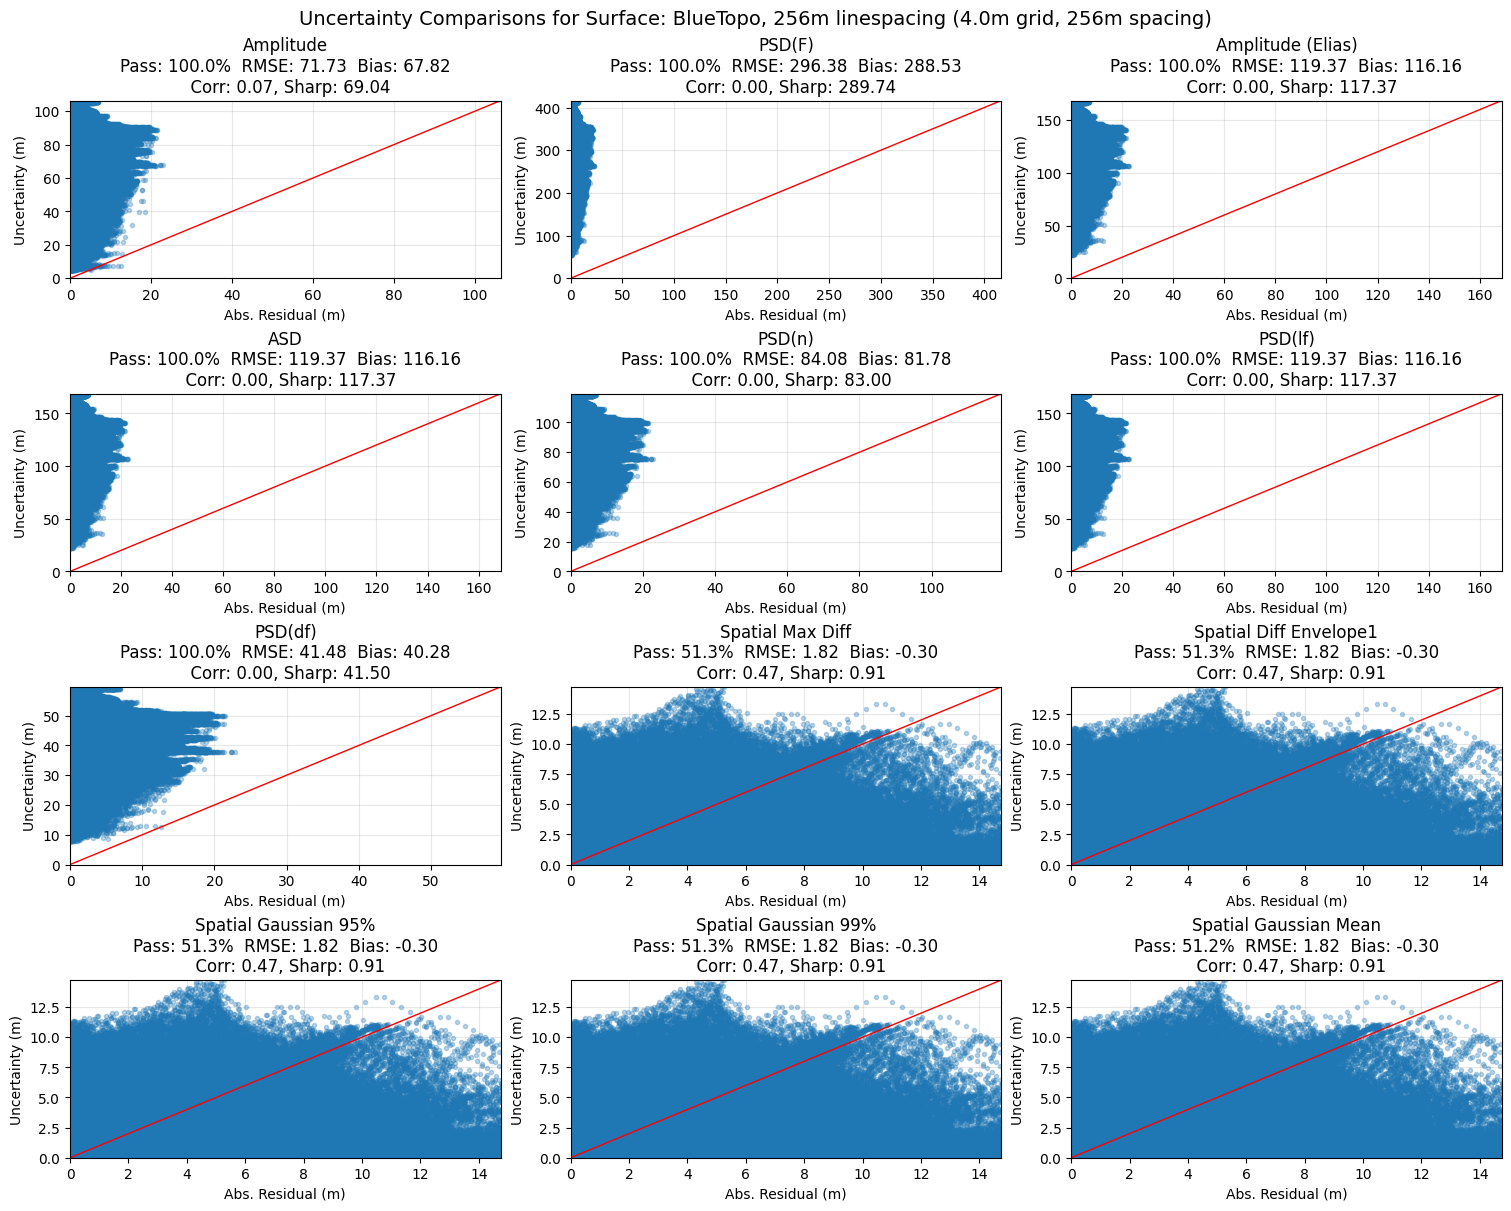

In [31]:
utils.multi_uncertainty_comparison(
    residuals=residual_data,
    uncertainties_dict=uncertainties_dict,
    resolution=bathy_data.metadata['resolution'],
    desired_linespacing_meters=linespacing,
    fn=f"Surface: BlueTopo, {linespacing}m linespacing",
    plot_grid=(4, 3),
    # path="./",
    # plot_boxplots=True
);

## Simulation

In [1]:
## Import modules
%reload_ext autoreload
%autoreload 2
from nbs_uncertainty.core.loadfile import load_file
from nbs_uncertainty.processors.rasterProcessor import RasterProcessor
from nbs_uncertainty.readers.bathymetryDataset import RasterDataset

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from pathlib import Path
from numpy.lib.stride_tricks import sliding_window_view

In [8]:
def process_file(filename: str, method: str):

    # Read filename and load bathy depth
    bathy_data = load_file(filename)
    max_multiple = 1
    current_multiple = 1
    windowing = 'hann'
    linespace_list = [64, 128, 256, 512, 1024]
    for l_space in linespace_list:
        linespacing = l_space
        bp_stats = []

        processor = RasterProcessor(linespacing_meters=linespacing,
                            max_multiple=max_multiple,
                            multiple=current_multiple)

        residual = processor.compute_residual_surface(bathy_data)
        current_uncertainty = processor.estimate_surface(method=method, bathy_data=bathy_data)
        linespacing_pixels = int(linespacing / bathy_data.metadata['resolution'])

        # Case 1
        case_1 = cbook.boxplot_stats(np.abs(residual.ravel()-current_uncertainty.ravel()), labels=['Case 1'])[0]
        bp_stats.append(case_1)


        # Case 2a: Use top row as base
        # Sample every linespacing_row
        base_data_2a = residual[::linespacing_pixels, :]

        # Duplicate rows n-times where n=linespacing
        base_surface_2a = np.repeat(base_data_2a, linespacing_pixels, axis=0)

        # Crop excess rows
        base_surface_2a = base_surface_2a[:residual.shape[0],:]
        uncertainty_2a = current_uncertainty[:base_surface_2a.shape[0],:]

        # Compute stats
        case_2a = cbook.boxplot_stats(np.abs(base_surface_2a.ravel()-uncertainty_2a.ravel()), labels=['Case 2a'])[0]
        bp_stats.append(case_2a)



        # Case 2b: Use middle row as base
        # Same as 2a but use the middle row
        offset = linespacing_pixels // 2
        base_data_2b = residual[offset::linespacing_pixels, :]
        base_surface_2b = np.repeat(base_data_2b, linespacing_pixels, axis=0)
        base_surface_2b = base_surface_2b[:residual.shape[0],:]
        current_uncertainty_2b = current_uncertainty[:base_surface_2b.shape[0],:]
        case_2b = cbook.boxplot_stats(np.abs(base_surface_2b.ravel()-current_uncertainty_2b.ravel()), labels=['Case 2b'])[0]
        bp_stats.append(case_2b)


        # Case 3a: Use left column (with flipping)
        # Convert surface to strip

        base_data_3a_strip = processor.matrix2strip(bathy_data)

        # Extract left-most column
        left_column = base_data_3a_strip[:, 0]

        # Create row views of the column where each view has dimension (1,linespacing)
        left_column_as_surface = sliding_window_view(left_column, linespacing_pixels)

        # Cast to RasterDataset
        left_column_as_surface = left_column_as_surface.view(RasterDataset)
        left_column_as_surface.__dict__.update(bathy_data.__dict__)
        uncertainty_3a = processor.estimate_surface(method=method, bathy_data=left_column_as_surface)
        left_residual = np.abs(processor.compute_residual(left_column_as_surface))

        new_container = np.zeros(shape=(uncertainty_3a.shape[0],
                                        uncertainty_3a.shape[1]+2))
        new_container[:, 1:-1] = uncertainty_3a
        uncertainty_3a = new_container

        # Recast
        uncertainty_3a = uncertainty_3a.view(RasterDataset)
        uncertainty_3a.__dict__.update(bathy_data.__dict__)

        offset = linespacing_pixels // 2
        base_surface_3a = residual_data[offset:-offset+1,:]
        case_3a = cbook.boxplot_stats(np.abs(left_residual.ravel()-uncertainty_3a.ravel()), labels=['Case 3a'])[0]
        bp_stats.append(case_3a)


        # Case 3b: Use right column (with flipping)
        # Convert surface to strip
        base_data_3b_strip = processor.matrix2strip(bathy_data)

        # Extract left-most column
        right_column = base_data_3b_strip[:, 0]

        # Create row views of the column where each view has dimension (1,linespacing)
        right_column_as_surface = sliding_window_view(right_column, linespacing_pixels)

        # Cast to RasterDataset
        right_column_as_surface = right_column_as_surface.view(RasterDataset)
        right_column_as_surface.__dict__.update(bathy_data.__dict__)
        uncertainty_3b = processor.estimate_surface(method=method, bathy_data=right_column_as_surface)
        right_residual = np.abs(processor.compute_residual(right_column_as_surface))

        new_container = np.zeros(shape=(uncertainty_3b.shape[0],
                                        uncertainty_3b.shape[1]+2))
        new_container[:, 1:-1] = uncertainty_3b
        uncertainty_3b = new_container

        # Recast
        uncertainty_3b = uncertainty_3b.view(RasterDataset)
        uncertainty_3b.__dict__.update(bathy_data.__dict__)

        offset = linespacing_pixels // 2
        base_surface_3b = residual_data[offset:-offset+1,:]
        case_3b = cbook.boxplot_stats(np.abs(right_residual.ravel()-uncertainty_3b.ravel()), labels=['Case 3b'])[0]
        bp_stats.append(case_3b)


        # # Case 4a: left and right (no flipping)
        # base_data_4_strip = processor.to_strip(bathy_data)
        # left_column = base_data_4_strip[:, 0]
        # left_column_as_surface = sliding_window_view(left_column, linespacing_pixels)
        # left_as_surface_data = deepcopy(bathy_data)
        # left_as_surface_data.depth_data = left_column_as_surface
        # processor_4a = getProcessor(left_as_surface_data, linespacing, current_multiple, max_multiple)
        # left_residual = np.abs(processor_4a.compute_residual(left_as_surface_data))
        #
        # residual_bathy = deepcopy(left_as_surface_data)
        # residual_bathy.depth_data = left_residual
        #
        # uncertainty_4a = processor_4a.estimate_surface(method=method , bathy_data=residual_bathy)
        # new_container = np.zeros(shape=(uncertainty_4a.shape[0],
        #                                 uncertainty_4a.shape[1]+2))
        # new_container[:, 1:-1] = uncertainty_4a
        # uncertainty_4a = new_container
        #
        #
        # right_column = base_data_4_strip[:, -1]
        # right_column_as_surface = sliding_window_view(right_column, linespacing_pixels)
        #
        # right_as_surface_data = deepcopy(bathy_data)
        # right_as_surface_data.depth_data = right_column_as_surface
        # processor_4a = getProcessor(right_as_surface_data, linespacing, current_multiple, max_multiple)
        # right_residual = np.abs(processor_4a.compute_residual(left_as_surface_data))
        #
        # residual_bathy = deepcopy(right_as_surface_data)
        # residual_bathy.depth_data = right_residual
        #
        # uncertainty_4a_right = processor_4a.estimate_surface(method=method, bathy_data=residual_bathy)
        # new_container = np.zeros(shape=(uncertainty_4a_right.shape[0],
        #                                 uncertainty_4a_right.shape[1]+2))
        # new_container[:, 1:-1] = uncertainty_4a_right
        # uncertainty_4a_right = new_container
        #
        #
        # offset = linespacing_pixels // 2
        # uncertainty_4a = deepcopy(uncertainty_4a)
        # uncertainty_4a[:, -offset:] = uncertainty_4a_right[:, -offset:]
        # residual_surface_4a = residual_data[offset:-offset+1,:]
        # case_4a = cbook.boxplot_stats(np.abs(residual_surface_4a.ravel()-uncertainty_4a.ravel()), labels=['Case 4a'])[0]
        # bp_stats.append(case_4a)
        #
        #
        # # Case 4b: left and right half_length with flipping
        #
        # base_data_4_strip = processor.to_strip(bathy_data)
        # left_column = base_data_4_strip[:, 0]
        # left_column_as_surface = sliding_window_view(left_column, linespacing_pixels // 2)
        # left_as_surface_data = deepcopy(bathy_data)
        # left_as_surface_data.depth_data = left_column_as_surface
        # processor_4b = getProcessor(left_as_surface_data, linespacing//2, current_multiple, max_multiple)
        # left_residual = np.abs(processor_4b.compute_residual(left_as_surface_data))
        #
        # residual_bathy = deepcopy(left_as_surface_data)
        # residual_bathy.depth_data = left_residual
        #
        # uncertainty_4b_left = processor_4b.estimate_surface(method=method, bathy_data=residual_bathy)[:-1]
        # # new_container = np.zeros(shape=(uncertainty_4b.shape[0],
        # #                                 uncertainty_4b.shape[1]+2))
        # # new_container[:, 1:-1] = uncertainty_4b
        # # uncertainty_4b_left = new_container
        #
        #
        # right_column = base_data_4_strip[:, -1]
        # right_column_as_surface = sliding_window_view(right_column, linespacing_pixels // 2)
        #
        # right_as_surface_data = deepcopy(bathy_data)
        # right_as_surface_data.depth_data = right_column_as_surface
        # processor_4b = getProcessor(right_as_surface_data, linespacing//2, current_multiple, max_multiple)
        # right_residual = np.abs(processor_4b.compute_residual(left_as_surface_data))
        #
        # residual_bathy = deepcopy(right_as_surface_data)
        # residual_bathy.depth_data = right_residual
        #
        # uncertainty_4b_right = processor_4b.estimate_surface(method=method, bathy_data=residual_bathy)[:-1]
        # # new_container = np.zeros(shape=(uncertainty_4b_right.shape[0],
        # #                                 uncertainty_4b_right.shape[1]+2))
        # # new_container[:, 1:-1] = uncertainty_4b_right
        # # uncertainty_4b_right = new_container
        #
        # uncertainty_4b = np.hstack([uncertainty_4b_left, uncertainty_4b_right])
        # uncertainty_4b = uncertainty_4b[int(offset/2):int(-offset/2),:]
        # # new_container = np.zeros(shape=(uncertainty_4b.shape[0],
        # #                                 uncertainty_4b.shape[1]+2))
        # # new_container[:, 1:-1] = uncertainty_4b
        # # uncertainty_4b = new_container
        # residual_surface_4b = residual_data[offset:-offset,1:-1]
        #
        # # print(f"residual_surface_4b shape: {residual_surface_4b.shape}")
        # # print(f"uncertainty_4b shape: {uncertainty_4b.shape}")
        # case_4b = cbook.boxplot_stats(np.abs(residual_surface_4b.ravel()-uncertainty_4b.ravel()), labels=['Case 4b'])[0]
        # bp_stats.append(case_4b)

        # fig, ax1 = plt.subplot()
        fig1, ax1 = plt.subplots(figsize=(10,6))
        ax1.bxp(bp_stats, patch_artist=True)
        plt.ylabel("Uncertainty")
        plt.xlabel("Linespacing (meters)")
        plt.title(f"""Surface: {Path(filename).stem}, {linespacing}m linespacing, Method: {method}""")
        # plt.legend(title="Mean Values")

    # return bp_stats


In [9]:
bluetopo = "../data/raster/BlueTopo.tiff"
flat = "../data/raster/Flat_LA.tif"
rough = "../data/raster/Rough_FL.tif"
rough_slopey = "../data/raster/Rough_Slopey.tif"
slopey = "../data/raster/Slopey_MA.tif"

filename = [bluetopo, flat, rough, rough_slopey, slopey]
methods = ['amp_v1',
           'psd_v1',
           'amp_v2',
            'psd_n',
            'psd_lf',
            'psd_df',
            'spectrum',
            'spatial_std',
            'spatial_diff',
            'spatial_gaussian']
for filename in filename:
    for method in methods:
        bp_stats = process_file(filename, method)

Warning 1: BlueTopo.tiff: This file used to have optimizations in its layout, but those have been, at least partly, invalidated by later changes


<class 'nbs_uncertainty.readers.bathymetryDataset.RasterDataset'>
<class 'nbs_uncertainty.readers.bathymetryDataset.RasterDataset'>
<class 'nbs_uncertainty.readers.bathymetryDataset.RasterDataset'>
<class 'nbs_uncertainty.readers.bathymetryDataset.RasterDataset'>


IndexError: index 1 is out of bounds for axis 0 with size 1

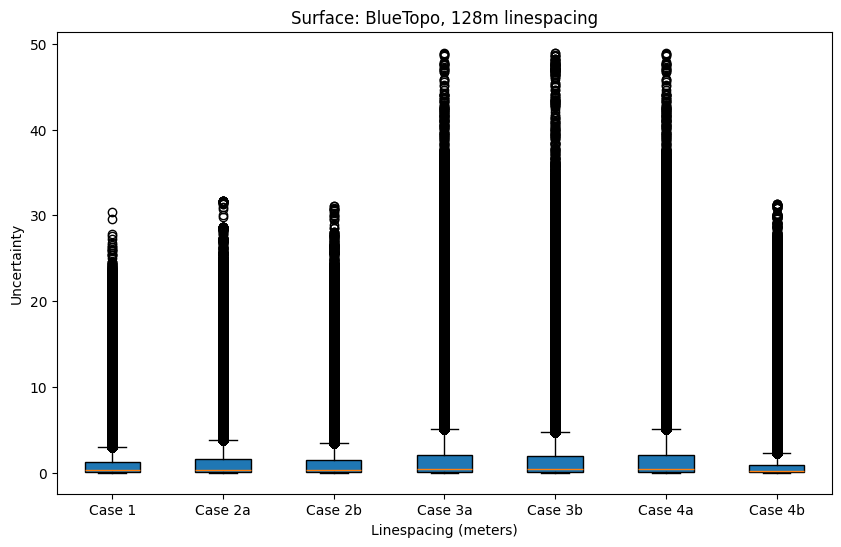

In [264]:
plt.close("all")
# fig, ax1 = plt.subplot()
fig1, ax1 = plt.subplots(figsize=(10,6))
# positions = np.arange(0, len(bp_stats))
# bplot = ax1.bxp(bp_stats, patch_artist=True, positions=positions)
ax1.bxp(bp_stats, patch_artist=True)
# linespacing_labels = [str(int(x)) for x in np.arange(start=128, stop=1025, step=64)]
# for patch in bplot['boxes']:
#     patch.set_facecolor("white")
plt.ylabel("Uncertainty")
plt.xlabel("Linespacing (meters)")
# locs = ax1.get_xticks()
# ax1.set_xticks(locs)
# ax1.set_xticklabels(bp_stats_labels)
# linespacing = []
# ax1.set_ylim(top=0.1)
# plt.plot(glen_psd, label="Glen PSD")
# plt.plot(elias_amp, label="Elias Amplitude")
# plt.plot(elias_psd_n, label="Elias PSD N")
# plt.plot(elias_psd_lf, label="Elias PSD LF")
# plt.plot(elias_psd_df, label="Elias PSD DF")
# plt.plot(elias_spectrum, label="Elias Spectrum")
# plt.plot(std_env1, label="Std Envelope1 (Max)")
# plt.plot(std_env2, label="Std Envelope2 (Max)")
# plt.plot(std_env3, label="Std Envelope3 (Max)")
# plt.plot(gaussian_mean, label="Gaussian Mean (Max)")
# plt.plot(gaussian_p95, label="Gaussian P95 (Max)")
# plt.plot(gaussian_p99, label="Gaussian P99 (Max)")
# plt.plot(difference_mean, label="Difference Mean (Max)")
plt.title(f"""Surface: {Path(filename).stem}, {linespacing}m linespacing""")
# plt.legend(title="Mean Values")
plt.show()


In [ ]:
# residual_data = residual.depth_data
# uncertainties_dict = {
#     "Amplitude": uncertainty_amp_v1.depth_data,
#     "PSD(F)": uncertainty_psd_v1.depth_data,
#     "Amplitude (Elias)": uncertainty_amp_elias.depth_data,
#     "ASD": uncertainty_amp_elias.depth_data,
#     "PSD(n)": uncertainty_psd_n.depth_data,
#     "PSD(lf)": uncertainty_psd_lf.depth_data,
#     "PSD(df)": uncertainty_psd_df.depth_data,
#     "Spatial Max Diff": uncertainty_spatial_diff.metadata['results']['difference_max'],
#     "Spatial Diff Envelope1": uncertainty_spatial_diff.metadata['results']['difference_max'],
#     "Spatial Gaussian 95%": uncertainty_spatial_gaussian.metadata['results']['gaussian_p95_stats'],
#     "Spatial Gaussian 99%": uncertainty_spatial_gaussian.metadata['results']['gaussian_p99_stats'],
#     "Spatial Gaussian Mean": uncertainty_spatial_gaussian.metadata['results']['gaussian_mean'],
#     }


# # Case 2a: Use top row as base
# import numpy as np
# base_data_2a = ground_truth[::linespacing_pixels, :]
# base_surface_2a = np.repeat(base_data_2a, linespacing_pixels, axis=0)
# base_surface_2a = base_surface_2a[:ground_truth.shape[0],:]
#
# # Case 2b: Use middle row as base
# offset = linespacing_pixels // 2
# base_data_2b = ground_truth[offset::linespacing_pixels, :]
# base_surface_2b = np.repeat(base_data_2b, linespacing_pixels, axis=0)
# base_surface_2b = base_surface_2b[:ground_truth.shape[0],:]
#
# # Case 3a: Use left column (with flipping)
# base_data_3a_strip = np.abs(residual.as_strip)
# left_column = base_data_3a_strip[:, 0]
# left_column_as_surface = sliding_window_view(left_column, linespacing_pixels)
# new_container = np.zeros(shape=(left_column_as_surface.shape[0],
#                                 left_column_as_surface.shape[1]+2))
# new_container[:, 1:-1] = left_column_as_surface
#
# left_column_as_surface = new_container
# offset = linespacing_pixels // 2
# base_surface_3a = base_data_3a_strip[offset:-offset+1,:]
#
#
# # Case 3b: Use right column (with flipping)
# base_data_3b_strip = np.abs(residual.as_strip)
# right_column = base_data_3b_strip[:, 0]
# right_column_as_surface = sliding_window_view(right_column, linespacing_pixels)
# new_container = np.zeros(shape=(right_column_as_surface.shape[0],
#                                 right_column_as_surface.shape[1]+2))
# right_column_as_surface = new_container
# offset = linespacing_pixels // 2
# base_surface_3b = base_data_3b_strip[offset:-offset+1,:]
#
#
# # Case 4: left and right (no flipping)
# base_data_4_strip = np.abs(residual.as_strip)
# left_column = base_data_4_strip[:, 0]
# left_column_as_surface = sliding_window_view(left_column, linespacing_pixels)
# right_column = base_data_4_strip[:, 0]
# right_column_as_surface = sliding_window_view(right_column, linespacing_pixels)
#
# offset = linespacing_pixels // 2
# base_surface_4 = base_data_4_strip[offset:-offset+1,:]


# uncertainty_amp_v1 = GlenAmplitude(bathydataset = residual_bathy,
#                                      linespacing_meters = linespacing,
#                                      current_multiple = current_multiple,
#                                      max_multiple = max_multiple).estimate_uncertainty()
# uncertainty_psd_v1 = GlenPSD(bathydataset = residual_bathy,
#                                      linespacing_meters = linespacing,
#                                      current_multiple = current_multiple,
#                                      max_multiple = max_multiple).estimate_uncertainty()
# uncertainty_amp_elias = EliasUncertainty(bathydataset = residual_bathy,
#                                      linespacing_meters = linespacing,
#                                      current_multiple = current_multiple,
#                                      max_multiple = max_multiple,
#                                      method='amplitude').estimate_uncertainty()
# uncertainty_psd_n = EliasUncertainty(bathydataset = residual_bathy,
#                                      linespacing_meters = linespacing,
#                                      current_multiple = current_multiple,
#                                      max_multiple = max_multiple,
#                                      method='psd_n').estimate_uncertainty()
# uncertainty_psd_lf = EliasUncertainty(bathydataset = residual_bathy,
#                                      linespacing_meters = linespacing,
#                                      current_multiple = current_multiple,
#                                      max_multiple = max_multiple,
#                                      method='psd_lf').estimate_uncertainty()
# uncertainty_psd_df = EliasUncertainty(bathydataset = residual_bathy,
#                                      linespacing_meters = linespacing,
#                                      current_multiple = current_multiple,
#                                      max_multiple = max_multiple,
#                                      method='psd_df').estimate_uncertainty()
# uncertainty_spectrum_elias = EliasUncertainty(bathydataset = residual_bathy,
#                                      linespacing_meters = linespacing,
#                                      current_multiple = current_multiple,
#                                      max_multiple = max_multiple,
#                                      method='spectrum').estimate_uncertainty()

# # Faster alternative
# raster_spatial = RasterSpatialProcessor(bathydataset = residual_bathy,
#                                      linespacing_meters = linespacing,
#                                      current_multiple = current_multiple,
#                                      max_multiple = max_multiple)
# uncertainty_spatial_std = raster_spatial.estimate_uncertainty(operator='spatial_std')
# uncertainty_spatial_diff = raster_spatial.estimate_uncertainty(operator='spatial_diff')
# uncertainty_spatial_gaussian = raster_spatial.estimate_uncertainty(operator='spatial_gaussian')




# linespace_list = [32, 64, 128, 256, 512, 1024]
linespace_list = [32]

# glen_amp = []
# glen_psd = []
# elias_amp = []
# elias_psd_df = []
# elias_psd_n = []
# elias_psd_lf = []
# elias_spectrum = []
# std_env1 = []
# std_env2 = []
# std_env3 = []
# gaussian_mean = []
# gaussian_p95 = []
# gaussian_p99 = []
# difference_mean = []
# bp_stats = []
# case_0 = []
# case_1 = []
# case_2a = []
# case_2b = []
# case_3a = []
# case_3b = []
# case_4 = []
# glen_amp = []
# glen_psd = []
# elias_amp = []
# elias_psd_df = []
# elias_psd_n = []
# elias_psd_lf = []
# elias_spectrum = []
# std_env1 = []
# std_env2 = []
# std_env3 = []
# gaussian_mean = []
# gaussian_p95 = []
# gaussian_p99 = []
# difference_mean = []
#
# glen_amp_bpstats = []
# glen_psd_bpstats = []
# elias_amp_bpstats = []
# elias_psd_df_bpstats = []
# elias_psd_n_bpstats = []
# elias_psd_lf_bpstats = []
# elias_spectrum_bpstats = []
# std_env1_bpstats = []
# std_env2_bpstats = []
# std_env3_bpstats = []
# gaussian_mean_bpstats = []
# gaussian_p95_bpstats = []
# gaussian_p99_bpstats = []
# difference_mean_bpstats = []
# residual_bp_stats = []
# case_0 = []

# case_1 = []
# case_2a = []
# case_2b = []
# case_3a = []
# case_3b = []
# case_4 = []


        # use residual dataset as "ground truth" to compute various uncertainty estimates
        # Spectral Methods
        # glen_amp.append(np.mean(GlenAmplitude(bathydataset = residual_bathy,
        #                              linespacing_meters = linespacing,
        #                              current_multiple = current_multiple,
        #                              max_multiple = max_multiple).estimate_uncertainty()))
        # glen_psd.append(np.mean(GlenPSD(bathydataset = residual_bathy,
        #                                      linespacing_meters = linespacing,
        #                                      current_multiple = current_multiple,
        #                                      max_multiple = max_multiple).estimate_uncertainty()))
        # elias_amp.append(np.mean(EliasUncertainty(bathydataset = residual_bathy,
        #                                      linespacing_meters = linespacing,
        #                                      current_multiple = current_multiple,
        #                                      max_multiple = max_multiple,
        #                                      method='amplitude').estimate_uncertainty()))
        # elias_psd_n.append(np.mean(EliasUncertainty(bathydataset = residual_bathy,
        #                                      linespacing_meters = linespacing,
        #                                      current_multiple = current_multiple,
        #                                      max_multiple = max_multiple,
        #                                      method='psd_n').estimate_uncertainty()))
        # elias_psd_lf.append(np.mean(EliasUncertainty(bathydataset = residual_bathy,
        #                                      linespacing_meters = linespacing,
        #                                      current_multiple = current_multiple,
        #                                      max_multiple = max_multiple,
        #                                      method='psd_lf').estimate_uncertainty()))
        # elias_psd_df.append(np.mean(EliasUncertainty(bathydataset = residual_bathy,
        #                                      linespacing_meters = linespacing,
        #                                      current_multiple = current_multiple,
        #                                      max_multiple = max_multiple,
        #                                      method='psd_df').estimate_uncertainty()))
        # elias_spectrum.append(np.mean(EliasUncertainty(bathydataset = residual_bathy,
        #                                      linespacing_meters = linespacing,
        #                                      current_multiple = current_multiple,
        #                                      max_multiple = max_multiple,
        #                                      method='spectrum').estimate_uncertainty()))
        #
        # # Spatial Methods
        # raster_spatial = RasterSpatialProcessor(bathydataset = residual_bathy,
        #                              linespacing_meters = linespacing,
        #                              current_multiple = current_multiple,
        #                              max_multiple = max_multiple)
        # uncertainty_spatial_std = raster_spatial.estimate_uncertainty(operator='spatial_std')
        # std_env1.append(np.max(uncertainty_spatial_std['std_envelope1']))
        # std_env2.append(np.max(uncertainty_spatial_std['std_envelope1']))
        # std_env3.append(np.max(uncertainty_spatial_std['std_envelope1']))
        #
        # uncertainty_spatial_diff = raster_spatial.estimate_uncertainty(operator='spatial_diff')
        # difference_mean.append(np.max(uncertainty_spatial_diff['difference_mean']))
        #
        # uncertainty_spatial_gaussian = raster_spatial.estimate_uncertainty(operator='spatial_gaussian')
        # gaussian_mean.append(np.max(uncertainty_spatial_gaussian['gaussian_mean']))
        # gaussian_p95.append(np.max(uncertainty_spatial_gaussian['gaussian_p95']))
        # gaussian_p99.append(np.max(uncertainty_spatial_gaussian['gaussian_p99']))

                # uncertainty_amp_v1 = processor.estimate_surface(method='amp_v1', bathy_data=residual_bathy)
        # uncertainty_psd_v1 = processor.estimate_surface(method='psd_v1', bathy_data=residual_bathy)
        # uncertainty_amp_elias = processor.estimate_surface(method='amp_v2', bathy_data=residual_bathy)
        # uncertainty_psd_n = processor.estimate_surface(method='psd_n', bathy_data=residual_bathy)
        # uncertainty_psd_lf = processor.estimate_surface(method='psd_lf', bathy_data=residual_bathy)
        # uncertainty_psd_df = processor.estimate_surface(method='psd_df', bathy_data=residual_bathy)
        # uncertainty_spectrum_elias = processor.estimate_surface(method='spectrum', bathy_data=residual_bathy)
        # uncertainty_spatial_std = processor.estimate_surface(method='spatial_std', bathy_data=residual_bathy)
        # uncertainty_spatial_diff = processor.estimate_surface(method='spatial_diff', bathy_data=residual_bathy)
        # uncertainty_spatial_gaussian = processor.estimate_surface(method='spatial_gaussian', bathy_data=residual_bathy)



# uncertainty_psd_v1 = GlenPSD(bathydataset = residual_bathy,
#                                      linespacing_meters = linespacing,
#                                      current_multiple = current_multiple,
#                                      max_multiple = max_multiple).estimate_uncertainty()
# uncertainty_amp_elias = EliasUncertainty(bathydataset = residual_bathy,
#                                      linespacing_meters = linespacing,
#                                      current_multiple = current_multiple,
#                                      max_multiple = max_multiple,
#                                      method='amplitude').estimate_uncertainty()
# uncertainty_psd_n = EliasUncertainty(bathydataset = residual_bathy,
#                                      linespacing_meters = linespacing,
#                                      current_multiple = current_multiple,
#                                      max_multiple = max_multiple,
#                                      method='psd_n').estimate_uncertainty()
# uncertainty_psd_lf = EliasUncertainty(bathydataset = residual_bathy,
#                                      linespacing_meters = linespacing,
#                                      current_multiple = current_multiple,
#                                      max_multiple = max_multiple,
#                                      method='psd_lf').estimate_uncertainty()
# uncertainty_psd_df = EliasUncertainty(bathydataset = residual_bathy,
#                                      linespacing_meters = linespacing,
#                                      current_multiple = current_multiple,
#                                      max_multiple = max_multiple,
#                                      method='psd_df').estimate_uncertainty()
# uncertainty_spectrum_elias = EliasUncertainty(bathydataset = residual_bathy,
#                                      linespacing_meters = linespacing,
#                                      current_multiple = current_multiple,
#                                      max_multiple = max_multiple,
#                                      method='spectrum').estimate_uncertainty()
#
# # Faster alternative
# raster_spatial = RasterSpatialProcessor(bathydataset = residual_bathy,
#                                      linespacing_meters = linespacing,
#                                      current_multiple = current_multiple,
#                                      max_multiple = max_multiple)
# uncertainty_spatial_std = raster_spatial.estimate_uncertainty(operator='spatial_std')
# uncertainty_spatial_diff = raster_spatial.estimate_uncertainty(operator='spatial_diff')
# uncertainty_spatial_gaussian = raster_spatial.estimate_uncertainty(operator='spatial_gaussian')

